In [65]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("./movies.csv")

In [3]:
data.head()

,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,0,52287414,Stand by Me,R,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,1,70136369,Ferris Bueller's Day Off,PG-13,2,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,2,179800601,Top Gun,PG,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,2,85160248,Aliens,R,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,0,18564613,Flight of the Navigator,PG,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [4]:
data.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'genre_encoded',
       'gross', 'name', 'rating', 'rating_encoded', 'released', 'runtime',
       'score', 'star', 'votes', 'writer', 'year released'],
      dtype='object')

In [5]:
data.isnull().sum(axis=0) # checked to make sure there is no missing data

budget            0
company           0
country           0
director          0
genre             0
genre_encoded     0
gross             0
name              0
rating            0
rating_encoded    0
released          0
runtime           0
score             0
star              0
votes             0
writer            0
year released     0
dtype: int64

In [6]:
movies_before_2000 = data[data['year released'] < 2000]
print("There are " + str(len(movies_before_2000)) + " movies from the dataset that were released before 2000.")
movies_before_2000.tail()

There are 3080 movies from the dataset that were released before 2000.


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
3075,0,3B Productions,France,Bruno Dumont,Drama,3,113495,Humanité,Not specified,5,1999-10-27,148,6.9,Emmanuel Schotté,3105,Bruno Dumont,1999
3076,0,C.E.O. Films,USA,George Haas,Drama,3,94633,Friends & Lovers,R,3,1999-04-16,100,4.5,Stephen Baldwin,1330,Neill Barry,1999
3077,312000,Spanky Pictures,USA,Gavin O'Connor,Drama,3,1281176,Tumbleweeds,PG-13,2,2000-03-03,102,6.7,Janet McTeer,3018,Angela Shelton,1999
3078,0,Cinerenta Medienbeteiligungs KG,USA,Scott Elliott,Drama,3,544538,A Map of the World,R,3,2000-01-21,125,6.7,Sigourney Weaver,3659,Jane Hamilton,1999
3079,7500000,Code Productions,USA,Robert Marcarelli,Action,2,12614346,The Omega Code,PG-13,2,1999-08-27,100,3.5,Casper Van Dien,4762,Stephan Blinn,1999


In [7]:
movies_2000_and_after = data[data['year released'] >= 2000]
print("There are " + str(len(movies_2000_and_after)) + " movies from the dataset that were released after 2000.")
movies_2000_and_after.tail()

There are 3740 movies from the dataset that were released after 2000.


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,1,4750497,Absolutely Fabulous: The Movie,R,3,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,3,28368,Mothers and Daughters,PG-13,2,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. 7,USA,Sam Liu,Animation,7,3775000,Batman: The Killing Joke,R,3,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,3,25981,The Eyes of My Mother,R,3,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,3,37757,From the Land of the Moon,R,3,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


# Question 1:
## What is the relationship between movie budget and revenue (gross), and is that relationship different for movies that came out before 2000 compared to movies that came out after 2000?

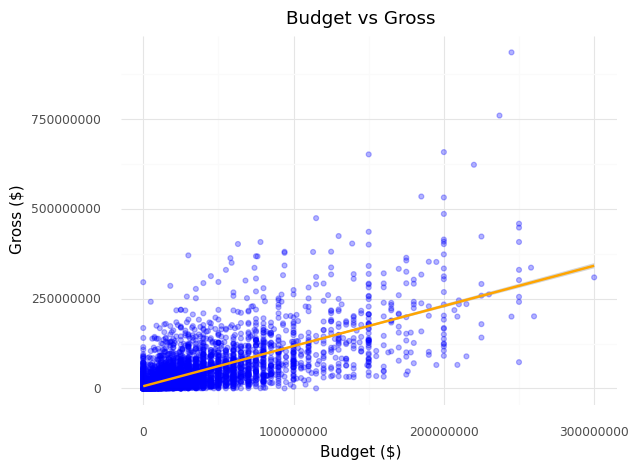

<ggplot: (314172341)>

In [8]:
(ggplot(data, aes(x = 'budget', y = 'gross')) + geom_point(colour = 'blue', alpha = 0.30) + theme_minimal() + ggtitle("Budget vs Gross") + labs(x = "Budget ($)", y = "Gross ($)") + geom_smooth(method = "lm", colour = 'orange'))

In [9]:
# labsList = ['Movies Released Before 2000', 'Movies Released 2000 and After']
year_assignments = []
for i in data['year released']:
    if i >= 2000:
        year_assignments.append(1)
    else:
        year_assignments.append(0)
len(year_assignments)

6820

In [10]:
data['year_assignments'] = year_assignments
data.tail()

,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released,year_assignments
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,1,4750497,Absolutely Fabulous: The Movie,R,3,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,1
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,3,28368,Mothers and Daughters,PG-13,2,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,1
6817,3500000,Warner Bros. 7,USA,Sam Liu,Animation,7,3775000,Batman: The Killing Joke,R,3,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,1
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,3,25981,The Eyes of My Mother,R,3,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,1
6819,0,Les Productions du Trésor,France,Nicole Garcia,Drama,3,37757,From the Land of the Moon,R,3,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,1


In [11]:
labsList = ["Cluster " + str(i) for i in year_assignments]
label_titles = ['Movies Released Before 2000', 'Movies Released 2000 and After']
print("Testing out the labsList list: ")
print(labsList[1000])
print(labsList[6000])

Testing out the labsList list: 
Cluster 0
Cluster 1


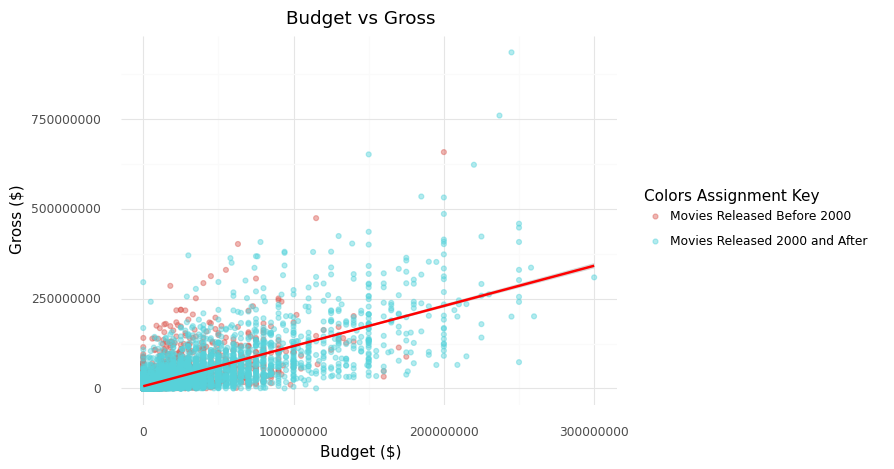

<ggplot: (314357986)>

In [12]:
(ggplot(data, aes(x = 'budget', y = 'gross', colour = "factor(year_assignments)")) 
 + geom_point(alpha = 0.45) 
 + theme_minimal() 
 + ggtitle("Budget vs Gross") 
 + labs(x = "Budget ($)", y = "Gross ($)") 
 + geom_smooth(method = "lm", colour = 'red')
 + scale_color_discrete(name = "Colors Assignment Key",
                       labels = label_titles)
)

## Anaylsis Plan
- The best way to start analyzing the relationship between movies' budgets and their respected gross profits is with visualization. The first visualization is to make a scatter plot of the features plotted against one another. The scatter plot visually depicts how these 2 variables (budget and gross) are related. It gives us insight on how 1 of the variables affects the other. Normally we cannot draw any concrete conclusions from this insight, but it gives inspiration on how to better analyze their relationship going forward. With this insight we can determine which types of models would be best to further analyze the relationship between the 2 variables. 

# Question 2

## 2. Using the number of user votes as a proxy for movie popularity, are certain genres, (action, drama, and adventure),  of movies more popular than others?

In [13]:
print("The dataset contains all of these genres: \n")
for i in data['genre'].unique():
    print(i)
print("\n")
print("However, we are only interested in action, drama, and adventure for this question.")

The dataset contains all of these genres: 

Adventure
Comedy
Action
Drama
Crime
Thriller
Horror
Animation
Biography
Sci-Fi
Musical
Family
Fantasy
Mystery
War
Romance
Western


However, we are only interested in action, drama, and adventure for this question.


In [45]:
print("All of the movies that are considered an action, drama, or adventure genre\nare found and then stored in the variable called data_genre_filtered")
desired_genres = ['Action', 'Adventure', 'Drama']
data_genre_filtered = data[data['genre'].isin(desired_genres)]
data_genre_filtered.head()

All of the movies that are considered an action, drama, or adventure genre
are found and then stored in the variable called data_genre_filtered


,budget,company,country,director,genre,genre_encoded,gross,name,rating,rating_encoded,released,runtime,score,star,votes,writer,year released,year_assignments
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,0,52287414,Stand by Me,R,3,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,0
2,15000000,Paramount Pictures,USA,Tony Scott,Action,2,179800601,Top Gun,PG,1,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,0
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,2,85160248,Aliens,R,3,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,0
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,0,18564613,Flight of the Navigator,PG,1,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,0
5,6000000,Hemdale,UK,Oliver Stone,Drama,3,138530565,Platoon,R,3,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,0


In [97]:
# init dict that will hold avg votes for each desired genre
user_votes_genres = {
    "Action": {
        "avg_user_votes": 0,
        "genre": 'Action',
        "count": 0
    },
    "Adventure": {
        "avg_user_votes": 0,
        "genre": "Adventure",
        "count": 0
    },
    "Drama": {
        "avg_user_votes": 0,
        "genre": "Drama",
        "count": 0
    }
}

# populate dict with avg votes for each genre
for key in user_votes_genres:
    user_votes_genres[key]['avg_user_votes'] = np.mean(data_genre_filtered[data_genre_filtered['genre'] == key]['votes'])
    user_votes_genres[key]['count'] = len(data_genre_filtered[data_genre_filtered['genre'] == key])
user_votes_genres

{'Action': {'avg_user_votes': 112157.26897069873,
  'genre': 'Action',
  'count': 1331},
 'Adventure': {'avg_user_votes': 106109.04081632652,
  'genre': 'Adventure',
  'count': 392},
 'Drama': {'avg_user_votes': 53389.16966759003,
  'genre': 'Drama',
  'count': 1444}}

In [98]:
# plt.bar(avg_user_votes_genres.keys(), avg_user_votes_genres.values())
DF_user_votes_genres = pd.DataFrame.from_dict(user_votes_genres, orient = 'index')
DF_user_votes_genres

,avg_user_votes,genre,count
Action,112157.268971,Action,1331
Adventure,106109.040816,Adventure,392
Drama,53389.169668,Drama,1444


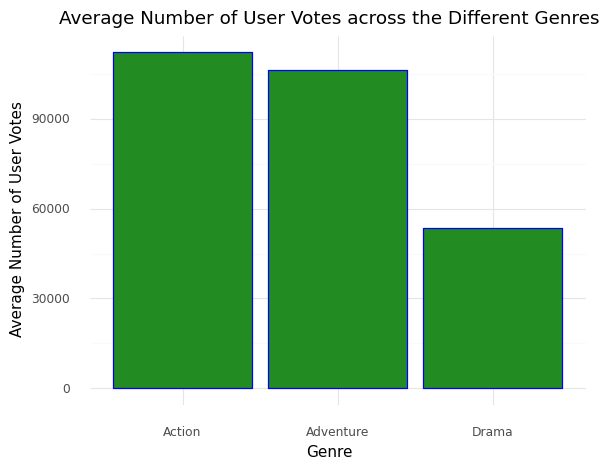

<ggplot: (314881365)>

In [99]:
(ggplot(DF_user_votes_genres, aes(x = 'genre', y='avg_user_votes')) + geom_bar(stat = "identity", color = "blue", fill="forestgreen") + theme_minimal() + ggtitle("Average Number of User Votes across the Different Genres") + labs(x = "Genre", y = "Average Number of User Votes"))

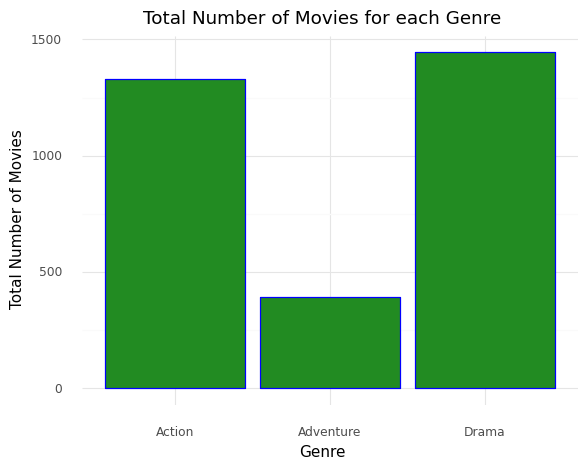

<ggplot: (314700773)>

In [101]:
(ggplot(DF_user_votes_genres, aes(x = 'genre', y='count')) + geom_bar(stat = "identity", color = "blue", fill="forestgreen") + theme_minimal() + ggtitle("Total Number of Movies for each Genre") + labs(x = "Genre", y = "Total Number of Movies"))